In [31]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [10]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [16]:
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect,4


In [18]:
df1=pd.get_dummies(df)

In [19]:
df1

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.300000,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,False,132,0.000000,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,False,148,0.400000,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,False,190,0.000000,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,False,126,1.500000,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,4,0,1,1,...,1,0,0,0,0,0,1,0,0,1
904,62,166,170,False,120,3.000000,4,0,1,1,...,0,1,0,0,0,1,0,0,0,1
905,56,170,0,False,123,2.500000,4,0,1,0,...,0,1,0,0,1,0,0,0,1,0
906,56,144,208,True,105,0.891253,4,0,1,0,...,0,0,0,1,1,0,0,1,0,0


In [22]:
X=df1.drop(columns=['num'])
Y=df1['num']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [24]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=None)

In [25]:
model.fit(x_test,y_test)

DecisionTreeClassifier(criterion='entropy')

In [26]:
pred=model.predict(x_test)

In [27]:
pred

array([0, 3, 4, 0, 1, 1, 0, 2, 1, 0, 0, 0, 3, 1, 0, 3, 1, 2, 1, 1, 1, 1,
       3, 0, 1, 1, 0, 0, 1, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 3,
       1, 0, 0, 0, 1, 4, 2, 1, 0, 0, 0, 2, 4, 2, 0, 0, 3, 0, 0, 3, 1, 1,
       3, 2, 3, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 1, 1, 0,
       3, 0, 0, 0, 1, 0, 3, 3, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 4, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 3, 0, 0, 0, 1, 2,
       1, 0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 0, 3, 2, 0, 0, 1, 0, 3, 2,
       0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 4, 0, 0, 2,
       1, 3, 1, 0, 1, 0], dtype=int64)

In [28]:
confusion_matrix(y_test,pred)

array([[87,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0],
       [ 0,  0, 17,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  6]], dtype=int64)

In [29]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        87\n           1       1.00      1.00      1.00        53\n           2       1.00      1.00      1.00        17\n           3       1.00      1.00      1.00        19\n           4       1.00      1.00      1.00         6\n\n    accuracy                           1.00       182\n   macro avg       1.00      1.00      1.00       182\nweighted avg       1.00      1.00      1.00       182\n'

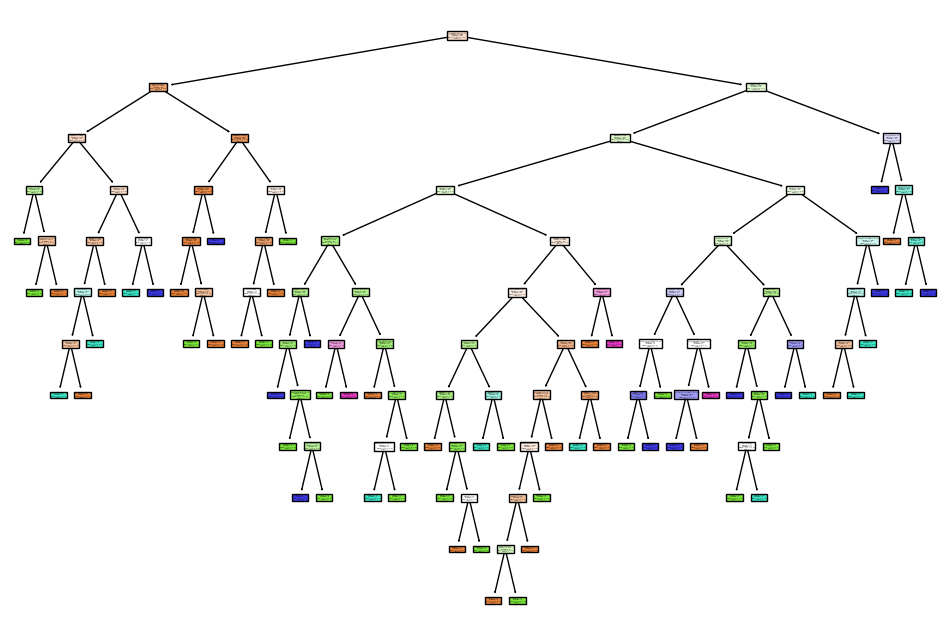

In [33]:
plt.figure(figsize=(12,8))
tree.plot_tree(model,feature_names=X.columns,class_names=['0','1','2','3','4'],filled=True)
plt.show()

In [35]:
'''label encoding ,one hot encoding converts the categorical values into numerical values 
where as label encoding converts the categorical values into numerical  by assighing unique integer to each category
 but where as one hot ecoding it creates a new binary colum for each categorty like 0,1 '''

'label encoding ,one hot encoding converts the categorical values into numerical values \nwhere as label encoding converts the categorical values into numerical  by assighing unique integer to each category\n but where as one hot ecoding it creates a new binary colum for each categorty like 0,1 '

In [ ]:
'''in decision tree models hyperparameters control the behaviour of the tree building process and it can siginficantly impact the models 
performance some are like we use max_depth, min_sample_split ,criterion '''